# Exploratory Data Analysis: Feature Correlation

The idea for this EDA file is to roughly check whether the target(sales) has any clear and visible pattern (i.e. it can be reasonable to build individual models if the sales are clearly clustered by store type).

In [53]:
import numpy as np
import pandas as pd
from DA_utils import *
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from sklearn import preprocessing


In [2]:
## getting main training data files (check DA_utils.py for detailed code)
raw_train, raw_store, raw_oil, raw_holiday = get_raw_all()

## First we focus on the provided train data and oil price data

In [16]:
raw_train.head(5)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [17]:
raw_oil.head(5)

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [32]:
## date - sales dataframe
df_by_date = raw_train.groupby('date', as_index = False).sum()[['date','sales']]
df_by_date['date'] = pd.to_datetime(df_by_date['date'])

## date - oil_price dataframe, fill NaN with next valid value
use_oil = raw_oil.fillna(method="bfill")
use_oil.rename(columns = {'dcoilwtico':'oil_price'}, inplace = True)
use_oil['date'] = pd.to_datetime(use_oil['date'])

## merge to date - sales - oil_price dataframe, and MinMax normalise sales and oil_price
check1 = df_by_date.merge(use_oil, on = 'date', how = "left")
check1.fillna(method = 'bfill', inplace = True)
norm_col = check1[['sales','oil_price']].values
min_max_scaler = preprocessing.MinMaxScaler()
scaled = min_max_scaler.fit_transform(norm_col)
normed = pd.DataFrame(scaled, columns = ['norm_sales', 'norm_oil_price'])
check2 = check1.join(normed)

In [34]:
check2.head()

,date,sales,oil_price,norm_sales,norm_oil_price
0,2013-01-01,2511.618999,93.14,0.000000,0.792965
1,2013-01-02,496092.417944,93.14,0.337937,0.792965
2,2013-01-03,361461.231124,92.97,0.245760,0.790951
3,2013-01-04,354459.677093,93.12,0.240966,0.792728
4,2013-01-05,477350.121229,93.20,0.325104,0.793675


In [87]:
# get monthly and annually avegage data
### Weekly
week_df = check1.set_index('date').groupby(pd.Grouper(freq="W")).mean().reset_index()
norm = week_df[['sales','oil_price']].values
scaled = min_max_scaler.fit_transform(norm)
normed = pd.DataFrame(scaled, columns = ['norm_sales', 'norm_oil_price'])
week_use = week_df.join(normed)
#week_use.head()

### Monthly
month_df = check1.set_index('date').groupby(pd.Grouper(freq="M")).mean().reset_index()
norm = month_df[['sales','oil_price']].values
scaled = min_max_scaler.fit_transform(norm)
normed = pd.DataFrame(scaled, columns = ['norm_sales', 'norm_oil_price'])
month_use = month_df.join(normed)
#month_use.head()

### Annually
year_df = check1.set_index('date').groupby(pd.Grouper(freq="Y")).mean().reset_index()
norm = year_df[['sales','oil_price']].values
scaled = min_max_scaler.fit_transform(norm)
normed = pd.DataFrame(scaled, columns = ['norm_sales', 'norm_oil_price'])
year_use = year_df.join(normed)
year_use.head()


,date,sales,oil_price,norm_sales,norm_oil_price
0,2013-12-31,385766.521757,97.998681,0.000000,1.000000
1,2014-12-31,575478.698631,93.223654,0.403802,0.912926
2,2015-12-31,661758.518282,48.639560,0.587448,0.099924
3,2016-12-31,790834.309463,43.159836,0.862185,0.000000
4,2017-12-31,855581.799001,49.413260,1.000000,0.114033


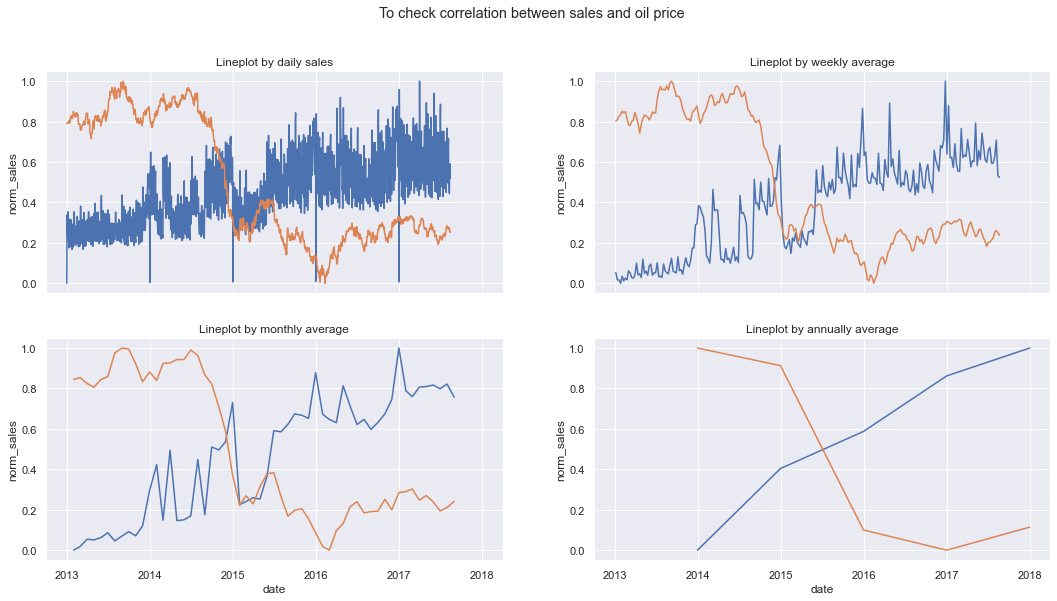

In [88]:
# set format and titles
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(18,9))
fig.suptitle('To check correlation between sales and oil price')
axes[0,0].set_title('Lineplot by daily sales')
axes[0,1].set_title('Lineplot by weekly average')
axes[1,0].set_title('Lineplot by monthly average')
axes[1,1].set_title('Lineplot by annually average')

# subplots
draw1 = check2
sns.lineplot(ax = axes[0,0], data = draw1, x = 'date', y = 'norm_sales')
sns.lineplot(ax = axes[0,0], data = draw1, x = 'date', y = 'norm_oil_price')

draw4 = week_use
sns.lineplot(ax = axes[0,1], data = draw4, x = 'date', y = 'norm_sales')
sns.lineplot(ax = axes[0,1], data = draw4, x = 'date', y = 'norm_oil_price')


draw2 = month_use
sns.lineplot(ax = axes[1,0], data = draw2, x = 'date', y = 'norm_sales')
sns.lineplot(ax = axes[1,0], data = draw2, x = 'date', y = 'norm_oil_price')

draw3 = year_use
sns.lineplot(ax = axes[1,1], data = draw3, x = 'date', y = 'norm_sales')
sns.lineplot(ax = axes[1,1], data = draw3, x = 'date', y = 'norm_oil_price')

# save picture
#plt.savefig('sales_oil.jpg')

## The we check the possible clear cluster of sales by stores 

In [89]:
raw_train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [91]:
raw_store.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [97]:
num_city = len({i for i in raw_store['city']})
num_state = len({i for i in raw_store['state']})
num_type = len({i for i in raw_store['type']})
num_cluster = len({i for i in raw_store['cluster']})
num_fam = len({i for i in raw_train['family']})
num_city, num_state, num_type, num_cluster, num_fam


(22, 16, 5, 17, 33)

In [98]:
use = raw_train.merge(raw_store, on = 'store_nbr').drop(columns = ['id','family', 
                                                                   'onpromotion','store_nbr'])
use['date'] = pd.to_datetime(use['date'])
use.head()

,date,sales,city,state,type,cluster
0,2013-01-01,0.0,Quito,Pichincha,D,13
1,2013-01-01,0.0,Quito,Pichincha,D,13
2,2013-01-01,0.0,Quito,Pichincha,D,13
3,2013-01-01,0.0,Quito,Pichincha,D,13
4,2013-01-01,0.0,Quito,Pichincha,D,13


In [135]:
## city cluster

# by week
by_week = use[['date','sales','city']].groupby([use.date.dt.to_period('W').apply(lambda r: r.start_time)
                                                ,'city']).mean().reset_index()

# by month
by_month = use[['date','sales','city']].groupby([use.date.dt.to_period('M').apply(lambda r: r.start_time),
                                                 'city']).mean().reset_index()



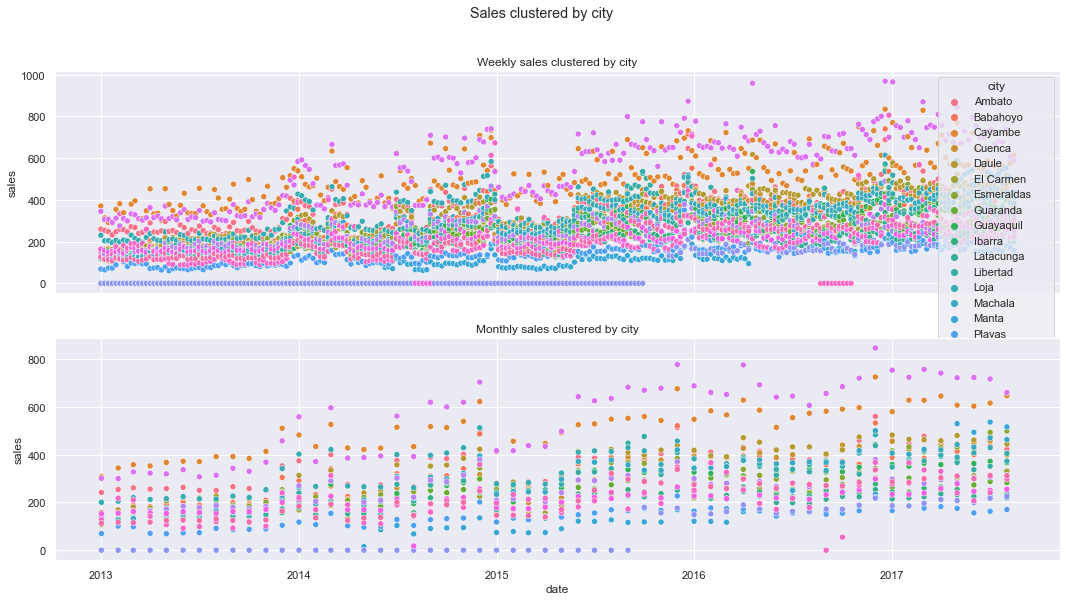

In [128]:
## scatter plots for city cluster
# set format and titles
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(18,9))
fig.suptitle('Sales clustered by city')
axes[0].set_title('Weekly sales clustered by city')
axes[1].set_title('Monthly sales clustered by city')

sns.scatterplot(ax = axes[0], data=by_week, x='date', y='sales', hue="city")
sns.scatterplot(ax = axes[1], data=by_month, x='date', y='sales', hue="city",legend = False)

# save picture
#plt.savefig('sales_city.jpg')

In [129]:
## state cluster

# by week
by_week = use[['date','sales','state']].groupby([use.date.dt.to_period('W').apply(lambda r: r.start_time)
                                                ,'state']).mean().reset_index()

# by month
by_month = use[['date','sales','state']].groupby([use.date.dt.to_period('M').apply(lambda r: r.start_time),
                                                  'state']).mean().reset_index()



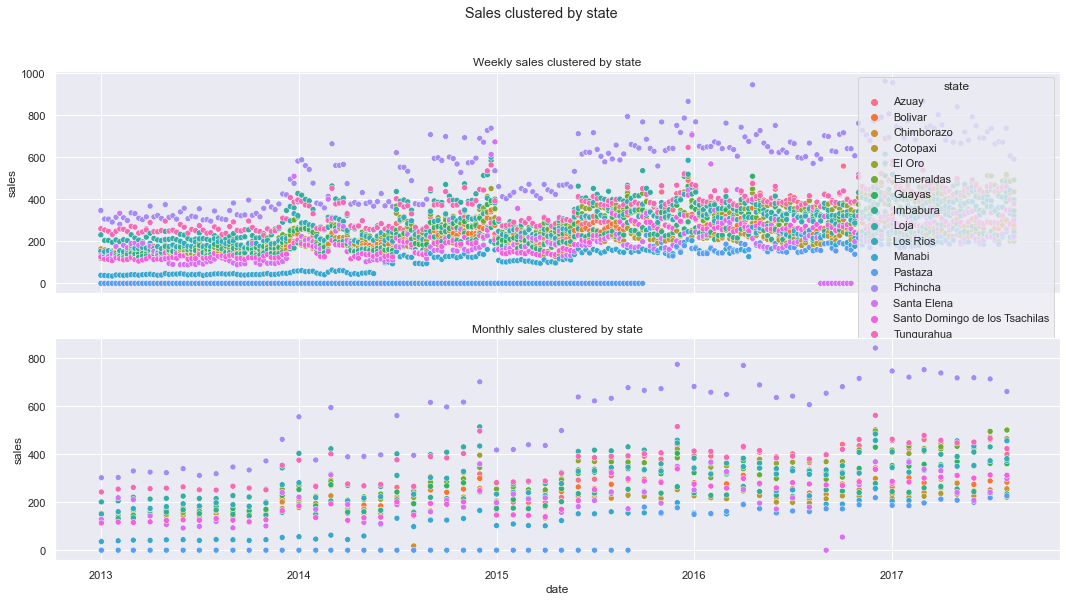

In [131]:
## scatter plots for state cluster
# set format and titles
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(18,9))
fig.suptitle('Sales clustered by state')
axes[0].set_title('Weekly sales clustered by state')
axes[1].set_title('Monthly sales clustered by state')

sns.scatterplot(ax = axes[0], data=by_week, x='date', y='sales', hue="state")
sns.scatterplot(ax = axes[1], data=by_month, x='date', y='sales', hue="state",legend = False)

# save picture
#plt.savefig('sales_state.jpg')

In [132]:
## type cluster

# by week
by_week = use[['date','sales','type']].groupby([use.date.dt.to_period('W').apply(lambda r: r.start_time)
                                                ,'type']).mean().reset_index()

# by month
by_month = use[['date','sales','type']].groupby([use.date.dt.to_period('M').apply(lambda r: r.start_time),
                                                 'type']).mean().reset_index()



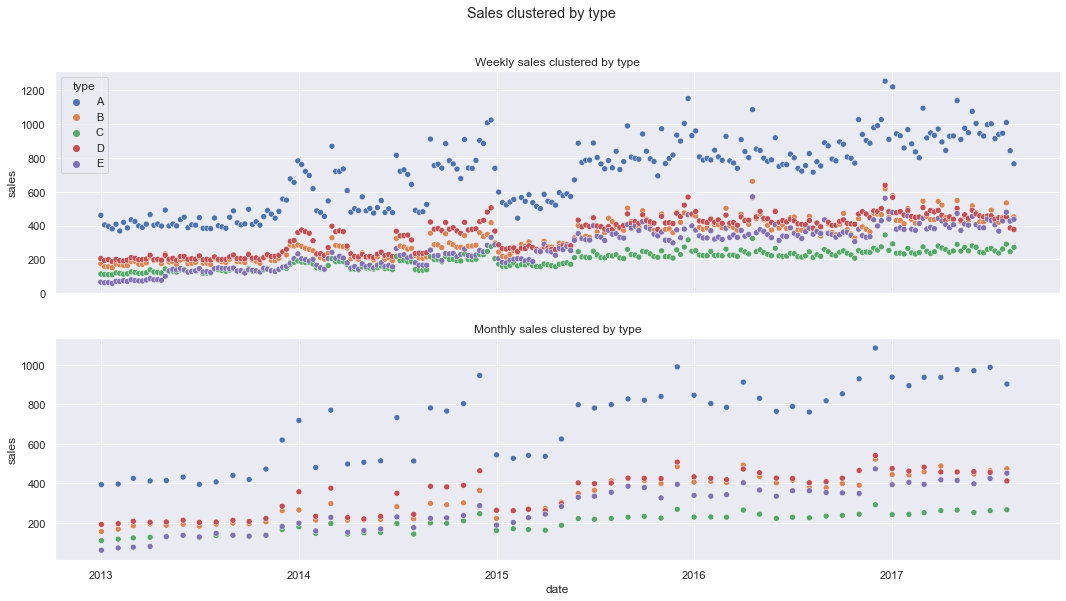

In [134]:
## scatter plots for type cluster
# set format and titles
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(18,9))
fig.suptitle('Sales clustered by type')
axes[0].set_title('Weekly sales clustered by type')
axes[1].set_title('Monthly sales clustered by type')

sns.scatterplot(ax = axes[0], data=by_week, x='date', y='sales', hue="type")
sns.scatterplot(ax = axes[1], data=by_month, x='date', y='sales', hue="type",legend = False)

# save picture
#plt.savefig('sales_type.jpg')

In [136]:
## cluster cluster

# by week
by_week = use[['date','sales','cluster']].groupby([use.date.dt.to_period('W').apply(lambda r: r.start_time)
                                                ,'cluster']).mean().reset_index()

# by month
by_month = use[['date','sales','cluster']].groupby([use.date.dt.to_period('M').apply(lambda r: r.start_time),
                                                    'cluster']).mean().reset_index()



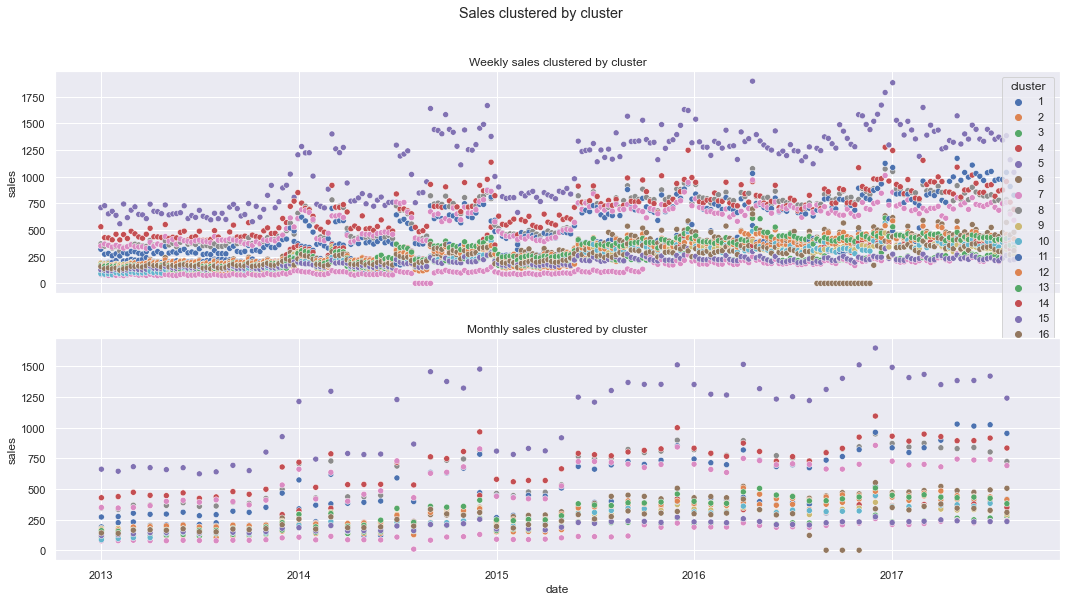

In [139]:
## scatter plots for cluster cluster
# set format and titles
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(18,9))
fig.suptitle('Sales clustered by cluster')
axes[0].set_title('Weekly sales clustered by cluster')
axes[1].set_title('Monthly sales clustered by cluster')

sns.scatterplot(ax = axes[0], data=by_week, x='date', y='sales', hue="cluster", palette="deep")
sns.scatterplot(ax = axes[1], data=by_month, x='date', y='sales', hue="cluster",palette="deep",legend = False)

# save picture
#plt.savefig('sales_cluster.jpg')

## Then we can check the holiday effects

In [170]:
raw_holiday.head(21)

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
5,2012-05-12,Holiday,Local,Puyo,Cantonizacion del Puyo,False
6,2012-06-23,Holiday,Local,Guaranda,Cantonizacion de Guaranda,False
7,2012-06-25,Holiday,Regional,Imbabura,Provincializacion de Imbabura,False
8,2012-06-25,Holiday,Local,Latacunga,Cantonizacion de Latacunga,False
9,2012-06-25,Holiday,Local,Machala,Fundacion de Machala,False


In [141]:
raw_train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [157]:
use = raw_train.merge(raw_holiday[['date', 'type','transferred']], on = 'date', how= "left")
use['date'] = pd.to_datetime(use['date'])
use.drop(columns= ['id','store_nbr','family','onpromotion'],inplace = True)
use['transferred'].fillna('no_event', inplace = True)
use['type'].fillna('others', inplace = True)
use.rename(columns = {'transferred':'day_type'}, inplace = True)
by_day = use.groupby(by = ['date','type','day_type'],as_index = False).sum()
by_day.loc[(by_day['date']>'2016-06-01') & (by_day['date']<'2016-07-01')]

,date,type,day_type,sales
1255,2016-06-02,others,no_event,6.945359e+05
1256,2016-06-03,others,no_event,7.423631e+05
1257,2016-06-04,others,no_event,1.011997e+06
1258,2016-06-05,others,no_event,1.123734e+06
1259,2016-06-06,others,no_event,7.298942e+05
1260,2016-06-07,others,no_event,6.587147e+05
1261,2016-06-08,others,no_event,6.967475e+05
1262,2016-06-09,others,no_event,5.471396e+05
1263,2016-06-10,others,no_event,6.373543e+05
1264,2016-06-11,others,no_event,8.458382e+05


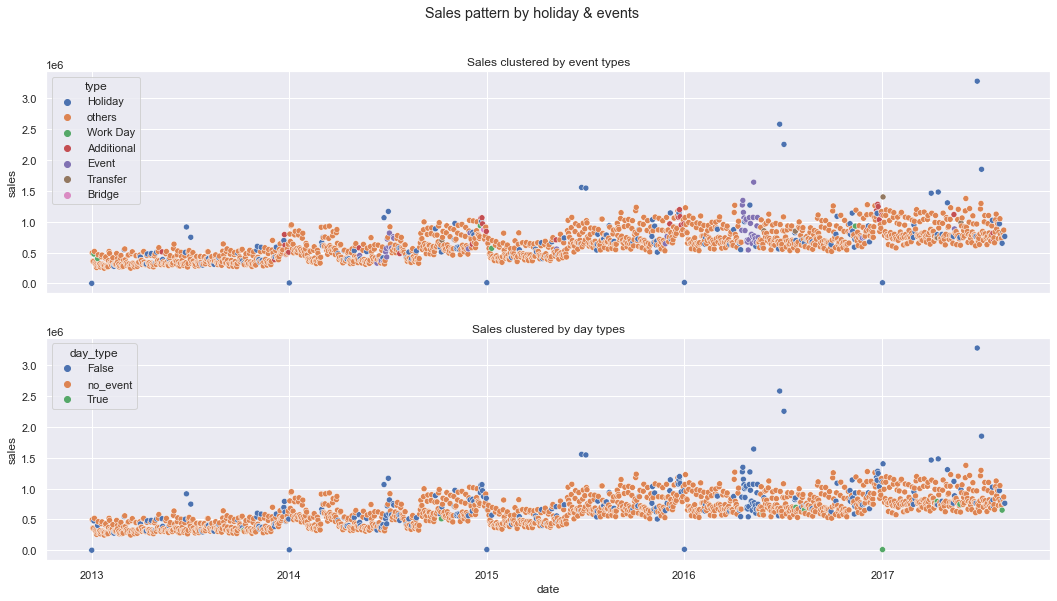

In [159]:
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(18,9))
fig.suptitle('Sales pattern by holiday & events')
axes[0].set_title('Sales clustered by event types')
axes[1].set_title('Sales clustered by day types')

sns.scatterplot(ax = axes[0], data=by_day, x='date', y='sales', hue="type", palette="deep")
sns.scatterplot(ax = axes[1], data=by_day, x='date', y='sales', hue="day_type", palette="deep")

# plt.savefig('sales_holiday.jpg')